In [53]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [54]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
import tensorflow as tf


In [72]:
dir  = '/content/drive/MyDrive/DDRUCNN/data/'

train = pd.read_csv(dir + '/train.csv', delimiter=',', header='infer', encoding='utf-8')
test = pd.read_csv(dir + '/test.csv', delimiter=',', header='infer', encoding='utf-8')

In [73]:
import shutil

dir  = '/content/drive/MyDrive/DDRUCNN/data/'

# for row in train.index:
    # shutil.move(dir + 'train/' + train['image'][row] + '.jpeg', dir + 'train/' + 'level_' + str(train['level'][row]) + '/' + train['image'][row] + '.jpeg')

# for row in test.index:
    # shutil.move(dir + 'test/' + test['image'][row] + '.jpeg', dir + 'test/' + 'level_' + str(test['level'][row]) + '/' + test['image'][row] + '.jpeg')

In [68]:
import keras, os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from keras.preprocessing.image import ImageDataGenerator

In [74]:
dir  = '/content/drive/MyDrive/DDRUCNN/data/'

tr_data = ImageDataGenerator()
train_data = tr_data.flow_from_directory(directory=dir + "train/", target_size=(224,224))

ts_data = ImageDataGenerator()
test_data = ts_data.flow_from_directory(directory= dir + "test/", target_size=(224,224))

Found 2832 images belonging to 5 classes.
Found 708 images belonging to 5 classes.


In [75]:
train_data.class_indices

{'level_0': 0, 'level_1': 1, 'level_2': 2, 'level_3': 3, 'level_4': 4}

In [48]:
model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

In [49]:
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=5, activation="softmax"))

In [50]:
from keras.optimizers import Adam
opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [51]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                    

In [82]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
STEP_SIZE_TRAIN = train_data.n//train_data.batch_size
STEP_SIZE_VALID = test_data.n//test_data.batch_size
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='accuracy', min_delta=0, patience=20, verbose=1, mode='auto')
hist = model.fit_generator(steps_per_epoch=STEP_SIZE_TRAIN,generator=train_data, validation_data= test_data, validation_steps=STEP_SIZE_VALID,epochs=30,callbacks=[checkpoint,early])

Epoch 1/30


<ipython-input-82-2f5267274031>:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(steps_per_epoch=STEP_SIZE_TRAIN,generator=train_data, validation_data= test_data, validation_steps=STEP_SIZE_VALID,epochs=30,callbacks=[checkpoint,early])


88/88 [==============================] - ETA: 0s - loss: 1.6096 - accuracy: 0.1814
Epoch 1: accuracy improved from -inf to 0.18143, saving model to vgg16_1.h5
88/88 [==============================] - 62s 700ms/step - loss: 1.6096 - accuracy: 0.1814 - val_loss: 1.6094 - val_accuracy: 0.2003
Epoch 2/30
88/88 [==============================] - ETA: 0s - loss: 1.6097 - accuracy: 0.1971
Epoch 2: accuracy improved from 0.18143 to 0.19714, saving model to vgg16_1.h5
88/88 [==============================] - 46s 517ms/step - loss: 1.6097 - accuracy: 0.1971 - val_loss: 1.6095 - val_accuracy: 0.1974
Epoch 3/30
88/88 [==============================] - ETA: 0s - loss: 1.6096 - accuracy: 0.1846
Epoch 3: accuracy did not improve from 0.19714
88/88 [==============================] - 40s 454ms/step - loss: 1.6096 - accuracy: 0.1846 - val_loss: 1.6094 - val_accuracy: 0.1989
Epoch 4/30
88/88 [==============================] - ETA: 0s - loss: 1.6096 - accuracy: 0.1918
Epoch 4: accuracy did not improve fro

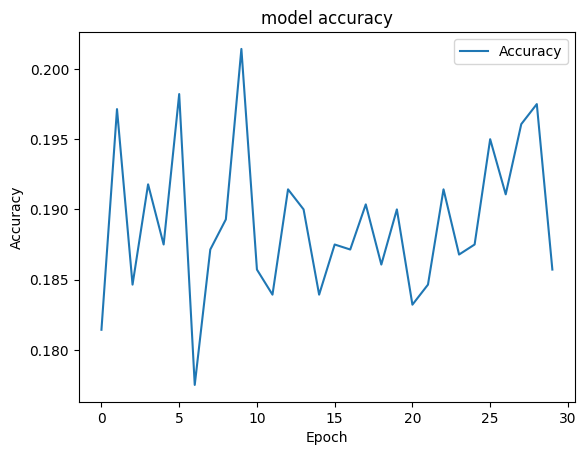

In [83]:
import matplotlib.pyplot as plt
plt.plot(hist.history["accuracy"])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()